**Import Packages**

In [33]:
import pandas as pd
import numpy as np

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

**Open the Wine Datasets**

In [34]:
wine = pd.read_csv("C:/Users/Samson/Documents/Notebook/Wine Quality Prediction/Datasets/winequality-red.csv")
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# **Data Cleanning**

**Remaning Columns Name**

In [35]:
wine.columns = wine.columns.str.replace(' ', "_")
wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

**Checking for Missing Data**

In [36]:
wine.isna().sum().sum()

0

**Checking for any duplicates**

In [37]:
wine.duplicated().sum()

240

**Removing the dupicates**

In [38]:
wine.drop_duplicates(inplace = True)
wine.reset_index(drop= True, inplace = True)
wine.shape[0]

1359

**Data Bining**

Wine Quality of 3-6 are bad (0) and 7-9 are good (1)


In [39]:
bins = (0,6.5,10)
name = (0,1) 

wine['grade']= pd.cut(wine['quality'], bins = bins, labels = name)
wine['grade'].values

[0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0]
Length: 1359
Categories (2, int64): [0 < 1]

**Converting from str to int**

In [40]:
wine['grade'] = wine['grade'].astype(int)
wine.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
grade                     int32
dtype: object

**Change the order of columns**

Shifting column '11' (quality) and '12' (level) to the left

In [41]:
order = [11,12] + list(range(11))
wine = wine[wine.columns[order]]
wine

,quality,grade,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,5,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,5,0,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,5,0,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,6,0,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,5,0,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1355,5,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1356,6,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1357,5,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


# Exploratory Data Analysis

**Summary of the Data**

In [42]:
wine.describe()

,quality,grade,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,5.623252,0.135394,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315
std,0.823578,0.342270,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065
min,3.000000,0.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,5.000000,0.000000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,6.000000,0.000000,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000
75%,6.000000,0.000000,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000
max,8.000000,1.000000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


**Number of wines for each quality**

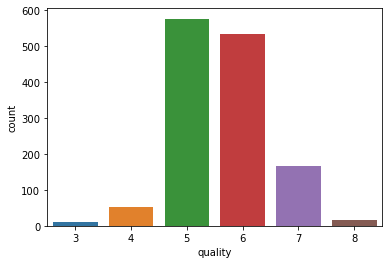

In [43]:
sns.countplot(x = "quality", data = wine)
plt.show()

**Number of Bad/Good Quality Wine**

<AxesSubplot:ylabel='grade'>

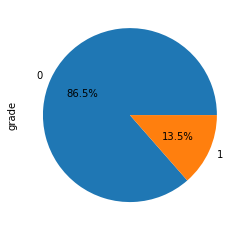

In [44]:
num = wine['grade'].value_counts()
num.plot.pie(autopct = '%1.1f%%')

**Quality of wine VS other variables**

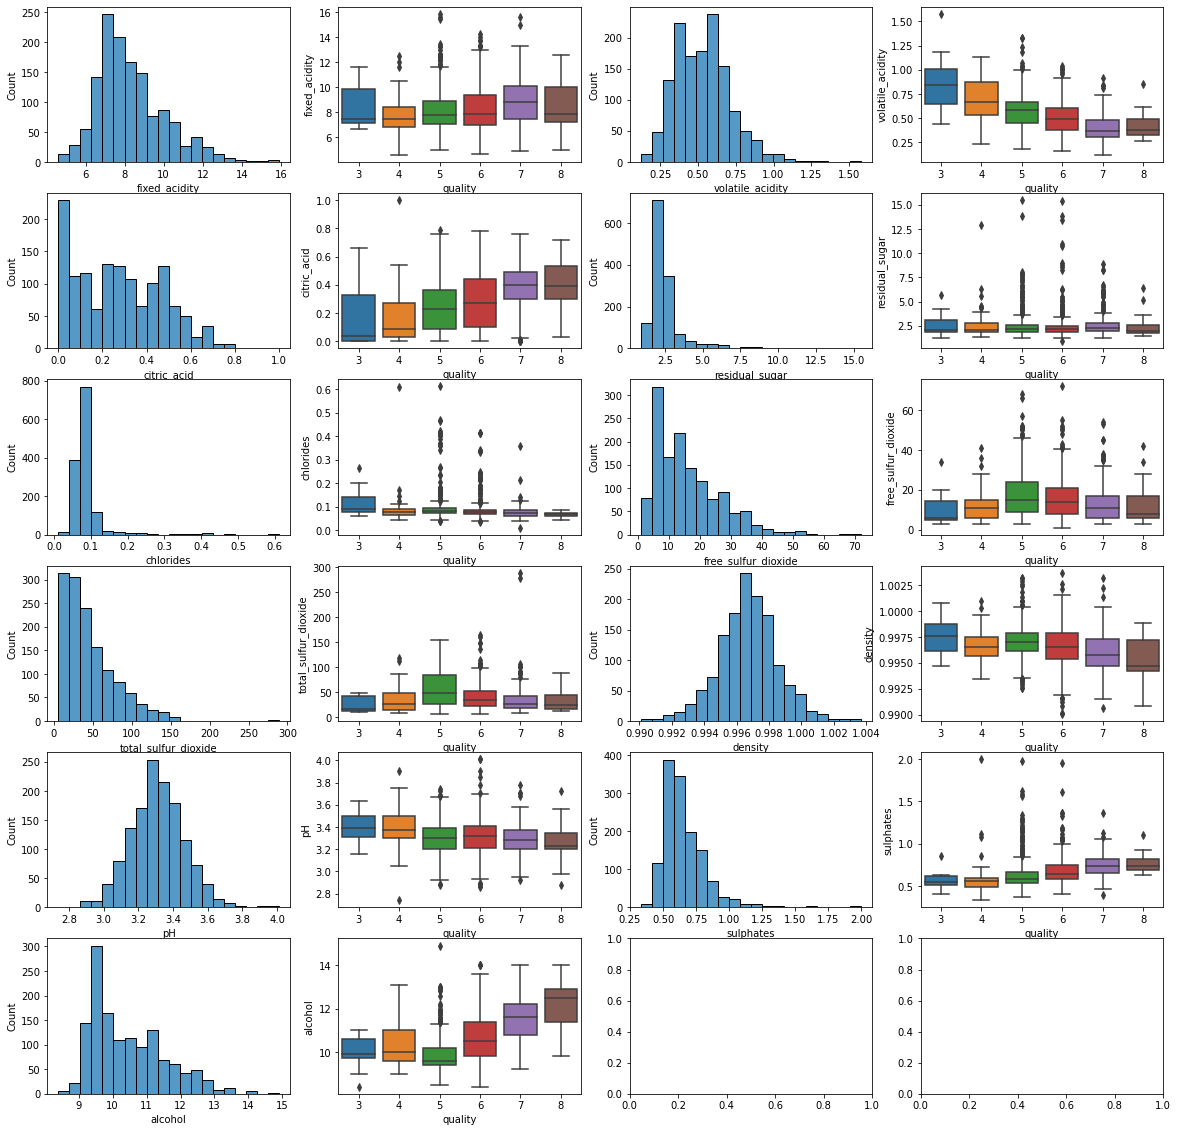

In [45]:
fig, ax = plt.subplots(ncols=4, nrows=6, figsize=(20,20))
index = 0
ax = ax.flatten()

for column_header in list(wine.columns.values[2:]):
    sns.histplot(x = column_header, data = wine, bins = 20, ax = ax[index])
    sns.boxplot(x = 'quality', y = column_header, data = wine, ax = ax[index + 1])
    index = index + 2

**Pair Plot**

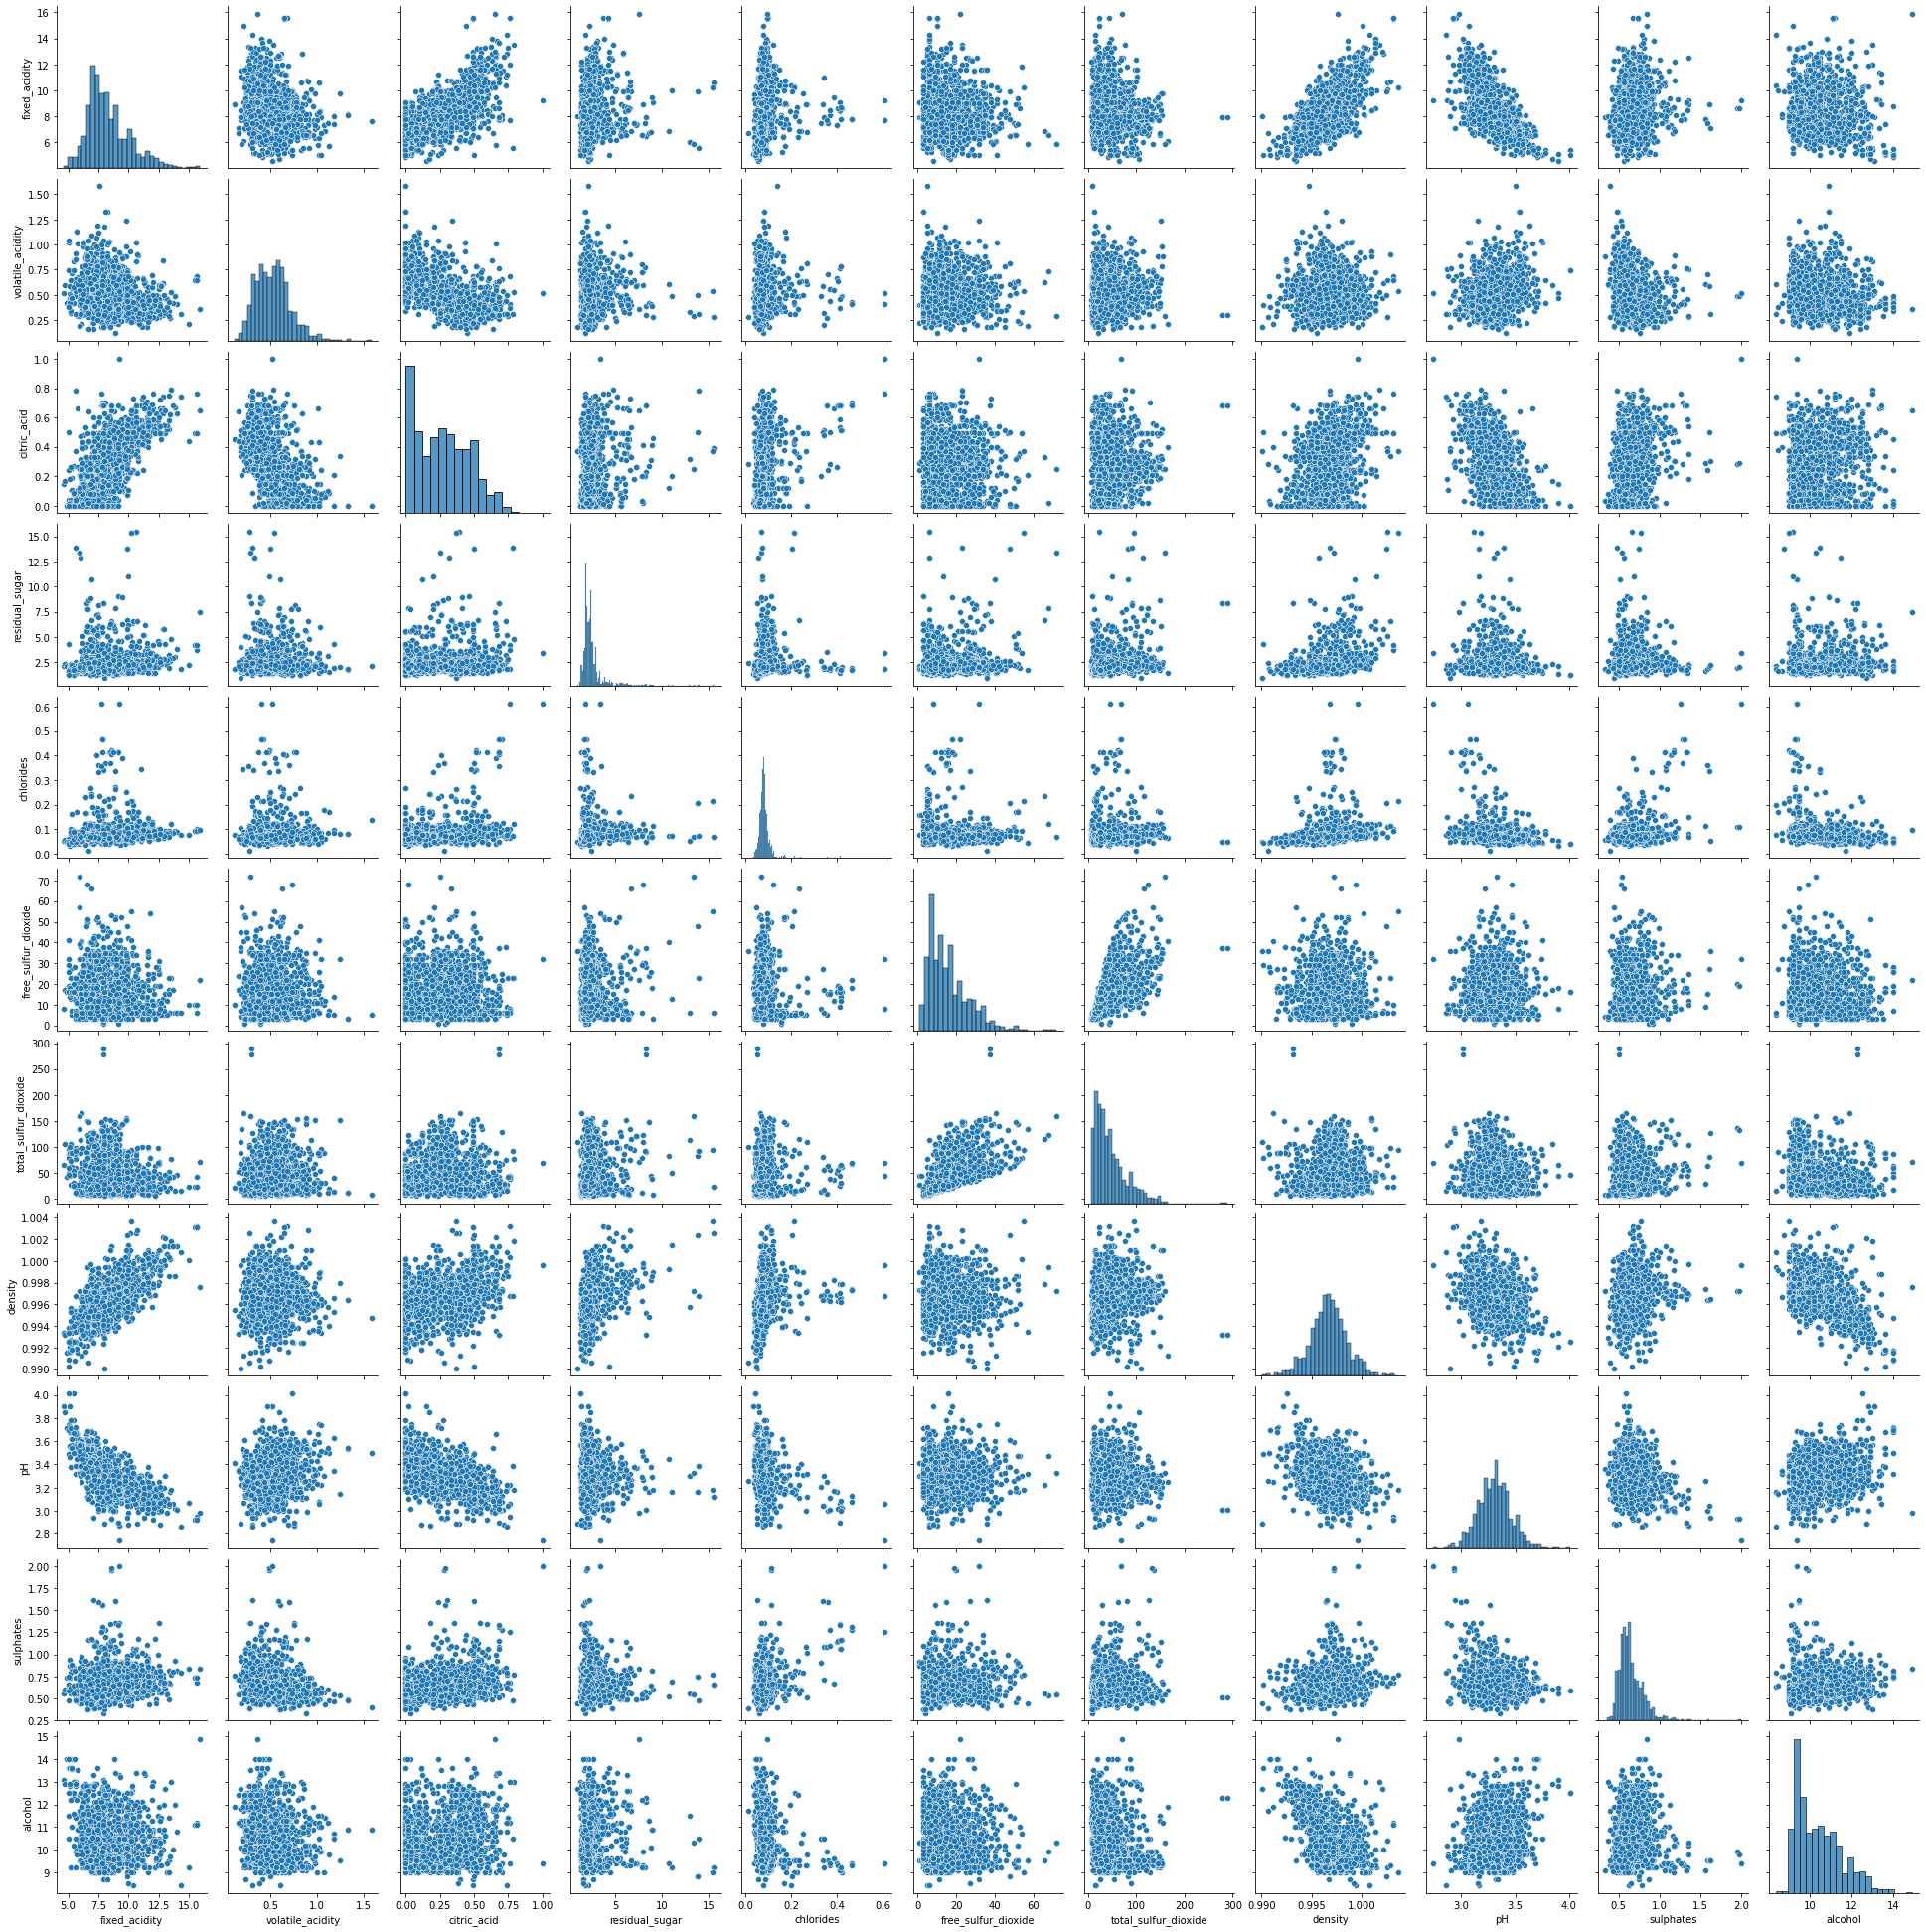

In [46]:
sns.pairplot(wine.drop(['grade', 'quality'], axis = 1))

**Correlation Heatmap**

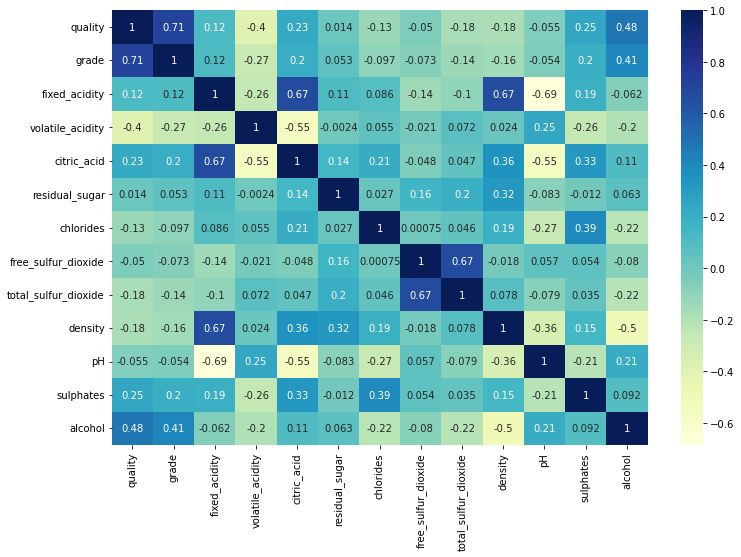

In [47]:
plt.figure(figsize = (12,8))
sns.heatmap(wine.corr(),annot = True, cmap="YlGnBu")
plt.show()

**Downloading the cleaned data into a new csv file**

In [48]:
wine.to_csv("wine_cleaned.csv", index = False)

# Model Building

**Spliting into dependent variable (Y) and independent variables (X)**

In [49]:
Y = wine['grade']
X = wine.drop(['quality', 'grade'], axis = 1)

**Balancing Classes**

Since there are way more bad quality wines (86.5%) than good quality wines (13.5%)

In [50]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(k_neighbors=3)
X_sm, Y_sm = sm.fit_resample(X,Y)

In [51]:
Y_sm.value_counts()

0    1175
1    1175
Name: grade, dtype: int64

**Model Training**

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_sm, Y_sm, test_size=0.2, random_state=3)

**Scaling**

In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [54]:
pd.DataFrame(X_train, columns = wine.columns[2:])

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,0.536364,0.082192,0.420000,0.061644,0.108514,0.070423,0.056537,0.552863,0.370079,0.431138,0.428571
1,0.371771,0.176880,0.407895,0.059601,0.092991,0.074623,0.021201,0.338240,0.456830,0.190566,0.621241
2,0.358378,0.135509,0.501471,0.201249,0.130643,0.140845,0.063604,0.383613,0.419330,0.212341,0.658438
3,0.200000,0.328767,0.180000,0.068493,0.111853,0.239437,0.282686,0.494126,0.669291,0.143713,0.160714
4,0.289826,0.274745,0.205032,0.059829,0.086712,0.028169,0.032528,0.446184,0.495803,0.381845,0.351349
...,...,...,...,...,...,...,...,...,...,...,...
1875,0.533423,0.187097,0.473530,0.077634,0.089002,0.084507,0.048288,0.467906,0.359745,0.293480,0.446297
1876,0.527273,0.273973,0.450000,0.075342,0.113523,0.070423,0.024735,0.563142,0.377953,0.257485,0.535714
1877,0.350023,0.042989,0.503644,0.059449,0.095776,0.616215,0.290924,0.370255,0.463044,0.251362,0.606649
1878,0.278697,0.187091,0.338284,0.085323,0.072789,0.448287,0.167996,0.452852,0.430148,0.290151,0.481609


# **Model Testing**

In [55]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

**Logistic Regression**

In [56]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, Y_train)
pred_lr = lr.predict(X_test)

print(classification_report(Y_test, pred_lr))
print(confusion_matrix(Y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79       239
           1       0.84      0.64      0.73       231

    accuracy                           0.76       470
   macro avg       0.78      0.76      0.76       470
weighted avg       0.78      0.76      0.76       470

[[211  28]
 [ 83 148]]


In [57]:
lr_eval = cross_val_score(estimator = lr, X = X_train, y = Y_train, cv = 10)
lr_eval.mean()

0.823404255319149

**Support Vector Classifier**

In [58]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, Y_train)
pred_svc = svc.predict(X_test)

print(classification_report(Y_test, pred_svc))
print(confusion_matrix(Y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       239
           1       0.87      0.67      0.75       231

    accuracy                           0.79       470
   macro avg       0.80      0.78      0.78       470
weighted avg       0.80      0.79      0.78       470

[[215  24]
 [ 77 154]]


In [59]:
svc_eval = cross_val_score(estimator = svc, X = X_train, y = Y_train, cv = 10)
svc_eval.mean()

0.8601063829787234

In [60]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(X_train, Y_train)
pred_kn = kn.predict(X_test)

print(classification_report(Y_test,pred_kn))
print(confusion_matrix(Y_test, pred_kn))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       239
           1       0.84      0.85      0.85       231

    accuracy                           0.85       470
   macro avg       0.85      0.85      0.85       470
weighted avg       0.85      0.85      0.85       470

[[202  37]
 [ 34 197]]


In [61]:
kn_eval = cross_val_score(estimator = kn, X = X_train, y = Y_train, cv = 10)
kn_eval.mean()

0.8792553191489363

**Random Forest Classifier**

In [62]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
pred_rfc = rfc.predict(X_test)

print(classification_report(Y_test, pred_rfc))
print(confusion_matrix(Y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.66      0.95      0.78       239
           1       0.91      0.50      0.65       231

    accuracy                           0.73       470
   macro avg       0.78      0.73      0.71       470
weighted avg       0.78      0.73      0.71       470

[[227  12]
 [115 116]]


In [63]:
from sklearn.model_selection import cross_val_score
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = Y_train, cv = 10)
rfc_eval.mean()

0.9159574468085105

Random Forest Classifier has the highest accuracy score

**Hyperparameter Tunning**

In [64]:
from sklearn.model_selection import RandomizedSearchCV

In [66]:
n_estimators = [int(x) for x in np.linspace(start=50, stop=1000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=10)] + [None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

rfc_optimized = RandomizedSearchCV(estimator=rfc, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42)

rfc_optimized.fit(X_train, Y_train)
pred_optimized = rfc_optimized.predict(X_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   2.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   2.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   2.0s
[CV] END bootstrap=True, max_depth=65, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=577; total time=   1.2s
[CV] END bootstrap=True, max_depth=65, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=577; total time=   1.2s
[CV] END bootstrap=True, max_depth=65, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=577; total time=   1.2s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=6

In [67]:
print(rfc_optimized.best_params_)
print(classification_report(Y_test, pred_optimized))
print(confusion_matrix(Y_test, pred_optimized))

{'n_estimators': 366, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 76, 'bootstrap': False}
              precision    recall  f1-score   support

           0       0.65      0.97      0.78       239
           1       0.93      0.47      0.62       231

    accuracy                           0.72       470
   macro avg       0.79      0.72      0.70       470
weighted avg       0.79      0.72      0.70       470

[[231   8]
 [123 108]]


In [72]:
rfc_new = RandomForestClassifier(n_estimators = 366, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 76, bootstrap = False)

rfc_eval = cross_val_score(estimator = rfc_new, X = X_train, y = Y_train, cv = 10)
rfc_eval.mean()

0.9218085106382977

The improved model increases the accuracy score from 91.6% to 92.3%